# Random Walk

 In this example we empirically compare the prediction abilities of TD(0) and constant-$\alpha$ MC when applied to the following Markov reward process (MRP):

In [1]:
from IPython.display import Image

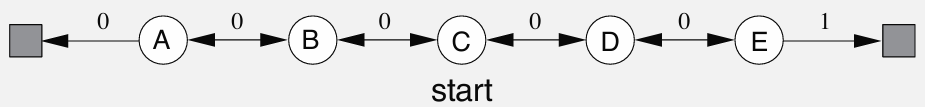

In [2]:
Image(filename="../book_images/Example_6_2_top.PNG")

MRP is a Markov decision process (MDP) without actions. We will often use MRPs when focusing on the prediction problem, in which there is no need to distinguish the dynamics due to the environment from those due to the agent.
- In this MRP, all episodes start in the center state, $C$, then proceed either left or right by one state on each step, with equal probability.
- Episodes terminate either on the extreme left or the extreme right.
  - When an episode terminates on the right, a reward of +1 occurs; all other rewards are 0.
  - For example, a typical episode might consist of the following state-and-reward sequence: $C,0,B,0,C,0,D,0,E,1$.
- Because this task is undiscounted, the true value of each state is the probability of terminating on the right if starting from that state.
  - Thus, the true value of the center state is $v_\pi(C)=0.5$.
  - The true values of all the states, $A$ through $E$, are $1/6, 2/6, 3/6, 4/6$, and $5/6$.

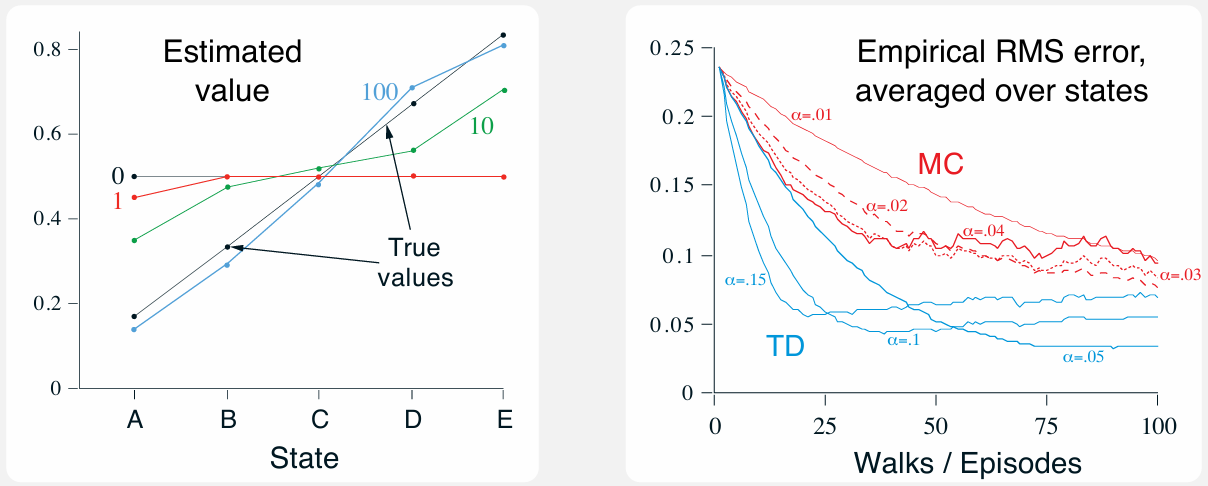

In [3]:
Image(filename="../book_images/Example_6_2_bottom.PNG")

- The left graph above shows the values learned after various numbers of episodes on a single run of TD(0).
  - The estimates after 100 episodes are about as close as they ever come to the true values—with a constant step-size parameter ($\alpha=0.1$ in this example), the values fluctuate indefinitely in response to the outcomes of the most recent episodes.
- The right graph shows learning curves for the 2 methods for various values of $\alpha$.
  - The performance measure shown is the root mean squared error (RMSE) between the VF learned and the true VF, averaged over the 5 states, then averaged over 100 runs.
  - In all cases the approximate VF was initialized to the intermediate value $V(s)=0.5, \forall s$.
- The TD method was consistently better than the MC method on this task.


In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

matplotlib.use('Agg')

In [5]:
from src.random_walk import approximate_values, true_values, monte_carlo, temporal_difference

In [6]:
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)

<Axes: >

In [7]:
# Create list of episodes
episodes = [0, 1, 10, 100]

# Get the current state-values of non-terminal states
current_values = np.copy(approximate_values)

In [8]:
plt.figure(1)

<Figure size 1000x2000 with 1 Axes>

In [9]:
for i in range(episodes[-1] + 1):
    if i in episodes:
        # Plot current state-values of non-terminal states
        plt.plot(('A', 'B', 'C', 'D', 'E'), current_values[1:6], label=f"{i} episodes")
    
    # TD update current state-values of non-terminal states
    temporal_difference(current_values)

In [10]:
# Plot true state-values of non-terminal states
plt.plot(('A', 'B', 'C', 'D', 'E'), true_values[1:6], label="True values")

# Set axis labels and legend
plt.xlabel("State")
plt.ylabel("Estimated value")
plt.legend()

In [11]:
plt.subplot(2, 1, 2)

<Axes: >

In [12]:
# Step-size parameters for TD
td_step_sizes = [0.15, 0.1, 0.05]

# Same step-size parameters can appear in both lists

# Step-size parameters for MC
mc_step_sizes = [0.01, 0.02, 0.03, 0.04]

In [13]:
# Number of episodes
episodes = 100 + 1

# Number of runs
runs = 100

In [14]:
# For every (index, step-size parameter) pair in TD and MC step-size parameters list
for i, step_size in enumerate(td_step_sizes + mc_step_sizes):
    # create an array of total errors filled with 0s
    total_errors = np.zeros(episodes)
    
    # check the method and define line style
    if i < len(td_step_sizes):
        method = 'TD'
        line_style = 'solid'
    else:
        method = 'MC'
        line_style = 'dashdot'
    
    # for every run
    for _ in tqdm(range(runs)):
        # create an empty list for RMSEs
        rms_errors = []
        
        # get the current state-values of non-terminal states
        current_values = np.copy(approximate_values)
        
        # for every episode
        for _ in range(0, episodes):
            # calculate RMSE between the true state-values and current state-values, averaged over the 5 states
            rmse = np.sqrt(np.sum(np.power(true_values - current_values, 2)) / 5.0)
            
            # append the RMSE to the list of RMSEs
            rms_errors.append(rmse)
            
            if method == 'TD':
                # TD update current state-values of non-terminal states
                temporal_difference(current_values, step_size=step_size)
            else:
                # MC update current state-values of non-terminal states
                monte_carlo(current_values, step_size=step_size)
        
        # add RMSEs to total errors
        total_errors += np.asarray(rms_errors)
    
    # average total errors over runs
    total_errors /= runs
    
    # plotting
    plt.plot(total_errors, linestyle=line_style, label=f'{method}, $\\alpha$ = {step_size}')

100%|██████████| 100/100 [00:00<00:00, 361.41it/s]


In [15]:
plt.xlabel("Walks/Episodes")
plt.ylabel("Empirical RMS error, averaged over states")
plt.legend()

In [16]:
plt.tight_layout()

In [17]:
plt.savefig("../generated_images/example_6_2.png")
plt.close()

## Random Walk under Batch updating

Batch-updating versions of TD(0) and constant-$\alpha$ MC were applied as follows to the random walk prediction example (Example 6.2).
- After each new episode, all episodes seen so far were treated as a batch.
- They were repeatedly presented to the algorithm, either TD(0) or constant-$\alpha$ MC, with $\alpha$ sufficiently small that the VF converged.
- The resulting VF was then compared with $v_\pi$, and the average RMSE across the 5 states (and across 100 independent repetitions of the whole experiment) was plotted to obtain the learning curves shown in Figure 6.2.
- Note that the batch TD method was consistently better than the batch MC method.

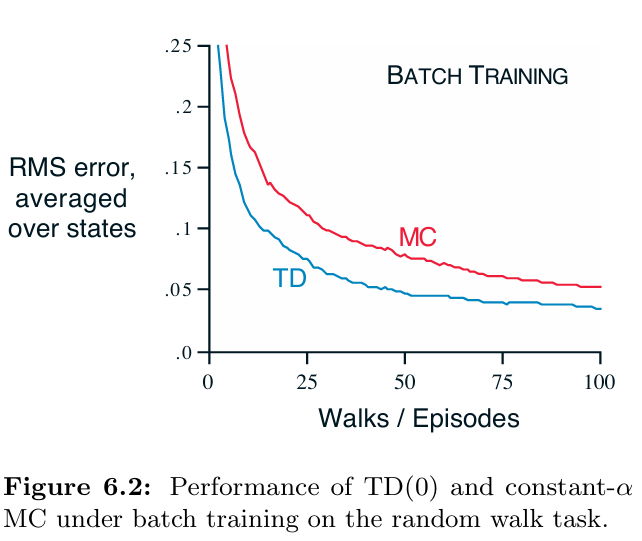

In [18]:
Image(filename="../book_images/Figure_6_2.PNG")

- Under batch training, constant-$\alpha$ MC converges to values, $V(s)$, that are sample averages of the actual returns experienced after visiting each state $s$.
- These are optimal estimates in the sense that they minimize the MSE from the actual returns in the training set.
- In this sense it is surprising that the batch TD method was able to perform better according to the RMSE measure shown in the Figure 6.2.
- How is it that batch TD was able to perform better than this optimal method? The answer is that the MC method is optimal only in a limited way, and that TD is optimal in a way that is more relevant to predicting returns.

In [19]:
from src.random_walk import batch_updating

In [20]:
# Number of episodes
episodes = 100 + 1

In [21]:
# RMSEs for TD
td_errors = batch_updating("TD", episodes)

# RMSEs for MC
mc_errors = batch_updating("MC", episodes)

100%|██████████| 100/100 [00:23<00:00,  4.17it/s]


In [22]:
# Plotting
plt.plot(td_errors, label='TD')
plt.plot(mc_errors, label='MC')

In [23]:
plt.title("Batch Training")
plt.xlabel("Walks/Episodes")
plt.ylabel("RMS error, averaged over states")
plt.xlim(0, 100)
plt.ylim(0, 0.25)
plt.legend()

In [24]:
plt.savefig("../generated_images/figure_6_2.png")
plt.close()